<a href="https://colab.research.google.com/github/Sandeep23017860/Data-science-project/blob/main/code_for_2_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
#ticker list
tickers = [ "BLK", "VTI" ]
tickers = sorted(list(set(tickers))) # Ensure uniqueness and sort

start_date = "1999-10-01"


# Dictionary to hold data for each ticker
stock_data = {}
invalid_tickers = []

for ticker in tickers:
    try:
        df = yf.download(ticker, start=start_date, progress=False)
        if df.empty:
            print(f"No data found for {ticker}, skipping.")
            invalid_tickers.append(ticker)
        else:
            print(f"Downloaded data for {ticker}")
            stock_data[ticker] = df
    except Exception as e:
        print(f"Could not download {ticker}: {e}")
        invalid_tickers.append(ticker)

YF.download() has changed argument auto_adjust default to True
Downloaded data for BLK
Downloaded data for VTI


In [14]:
# Pick a sample ticker
sample_ticker = "BLK"
df = stock_data[sample_ticker]

# Check first 5 rows
print(f"First 5 rows for {sample_ticker}:")
print(df.head())

# Check data shape (rows, columns)
print(f"\nShape of data for {sample_ticker}: {df.shape}")

# Check column names
print(f"\nColumns: {df.columns.tolist()}")

First 5 rows for BLK:
Price          Close      High       Low      Open   Volume
Ticker           BLK       BLK       BLK       BLK      BLK
Date                                                       
1999-10-01  8.579482  8.655407  8.503557  8.503557  3162400
1999-10-04  8.503557  8.579482  8.503557  8.579482   533400
1999-10-05  8.579482  8.579482  8.503557  8.503557   270600
1999-10-06  9.035028  9.035028  8.579481  8.579481   205400
1999-10-07  8.579482  9.035030  8.541520  9.035030   214200

Shape of data for BLK: (6432, 5)

Columns: [('Close', 'BLK'), ('High', 'BLK'), ('Low', 'BLK'), ('Open', 'BLK'), ('Volume', 'BLK')]


In [15]:
# Check data types and non-null counts
print(stock_data['BLK'].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6432 entries, 1999-10-01 to 2025-04-28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, BLK)   6432 non-null   float64
 1   (High, BLK)    6432 non-null   float64
 2   (Low, BLK)     6432 non-null   float64
 3   (Open, BLK)    6432 non-null   float64
 4   (Volume, BLK)  6432 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 301.5 KB
None


In [16]:
# Double Check if there are any NaN values in the DataFrame
print(df.isnull().any().any())  # Returns True if any NaN exists

False


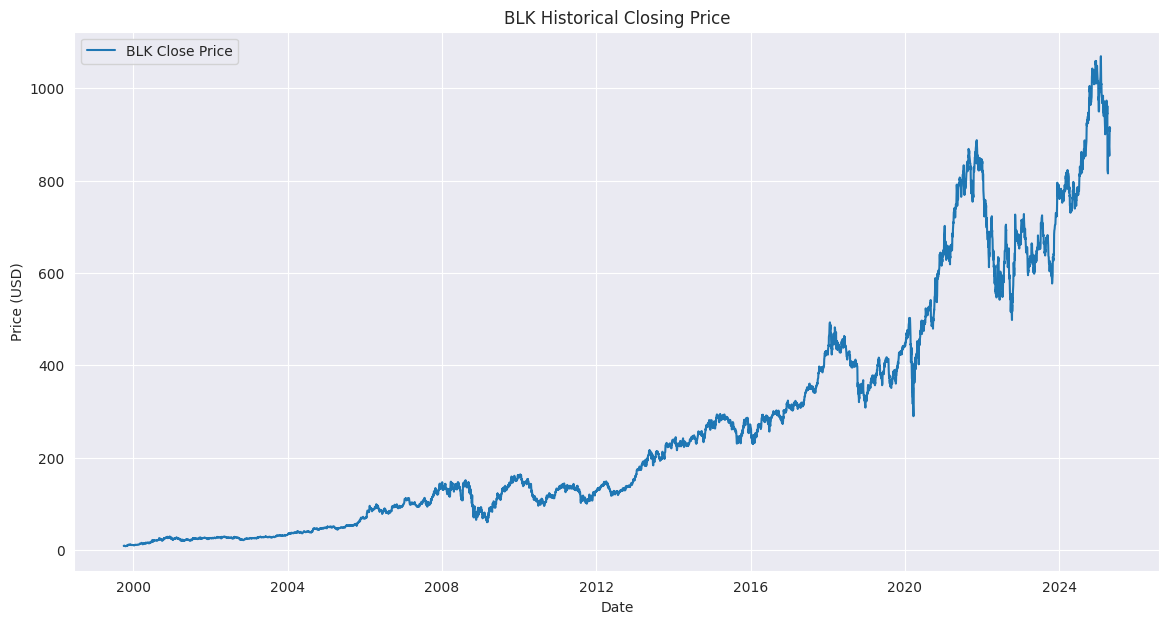

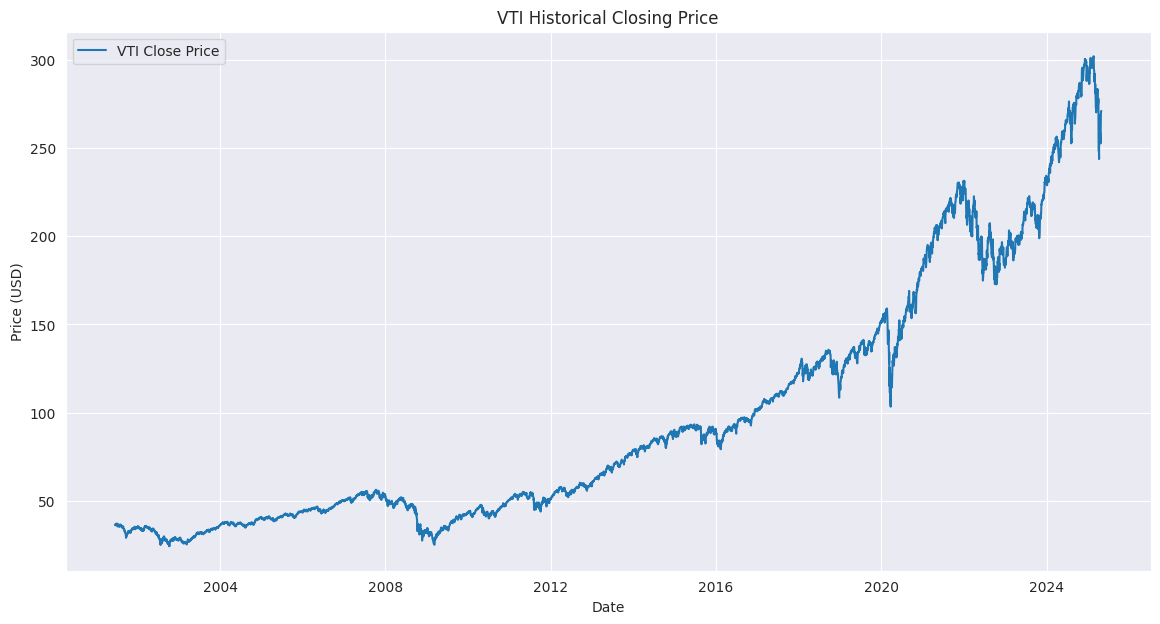

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid") # Personal preference

def plot_stock(ticker_symbol, data_dict):
    plt.figure(figsize=(14, 7))
    plt.plot(data_dict[ticker_symbol]['Close'], label=f'{ticker_symbol} Close Price')
    plt.title(f'{ticker_symbol} Historical Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot examples
plot_stock('BLK', stock_data)
plot_stock('VTI', stock_data)

In [18]:
from sklearn.preprocessing import MinMaxScaler

ticker = 'BLK'
df = stock_data[ticker][['Close']].copy()

# Define Train-Test Split
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)  # Fit on train data
test_scaled = scaler.transform(test_data)  # Transform test data

# Verify Scaling
print("Train Min:", train_scaled.min(), "Max:", train_scaled.max())
print("Test Min:", test_scaled.min(), "Max:", test_scaled.max())

Train Min: 0.0 Max: 1.0
Test Min: 0.5696068464751867 Max: 2.146339704523003


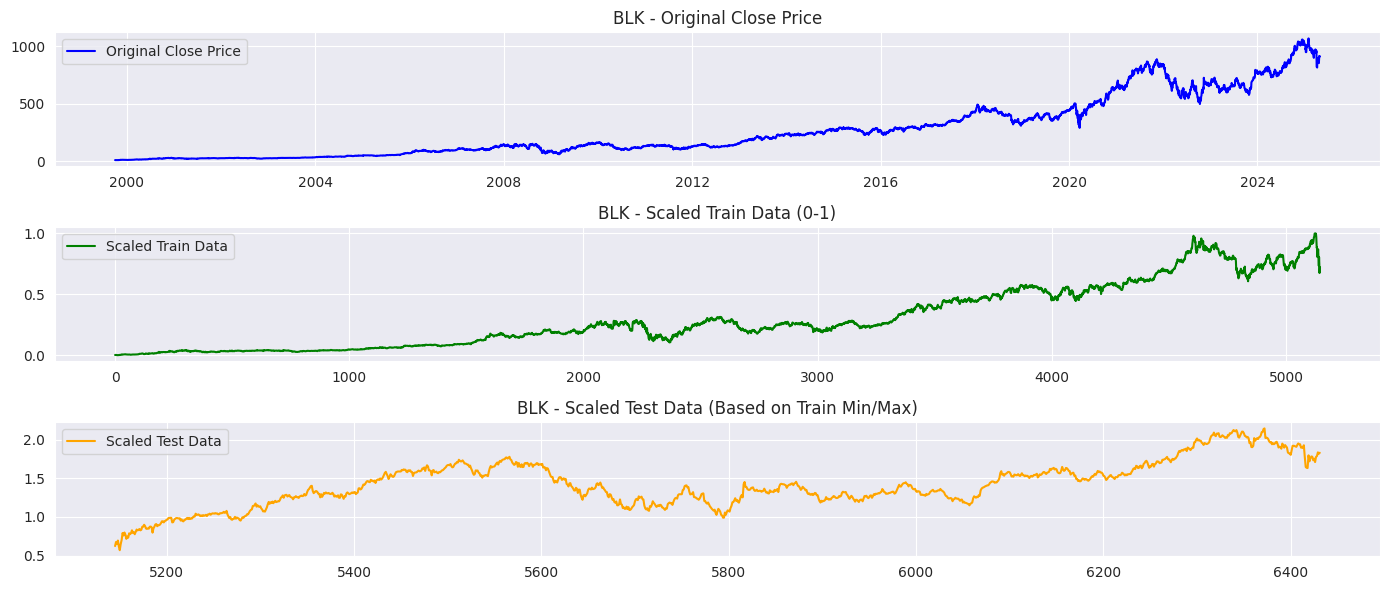

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Original Close Price', color='blue')
plt.title(f"{ticker} - Original Close Price")
plt.legend()

# Scaled Train Data
plt.subplot(3, 1, 2)
plt.plot(np.arange(len(train_scaled)), train_scaled, label='Scaled Train Data', color='green')
plt.title(f"{ticker} - Scaled Train Data (0-1)")
plt.legend()

# Scaled Test Data
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(train_scaled), len(train_scaled) + len(test_scaled)), test_scaled, label='Scaled Test Data', color='orange')
plt.title(f"{ticker} - Scaled Test Data (Based on Train Min/Max)")
plt.legend()

plt.tight_layout()
plt.show()


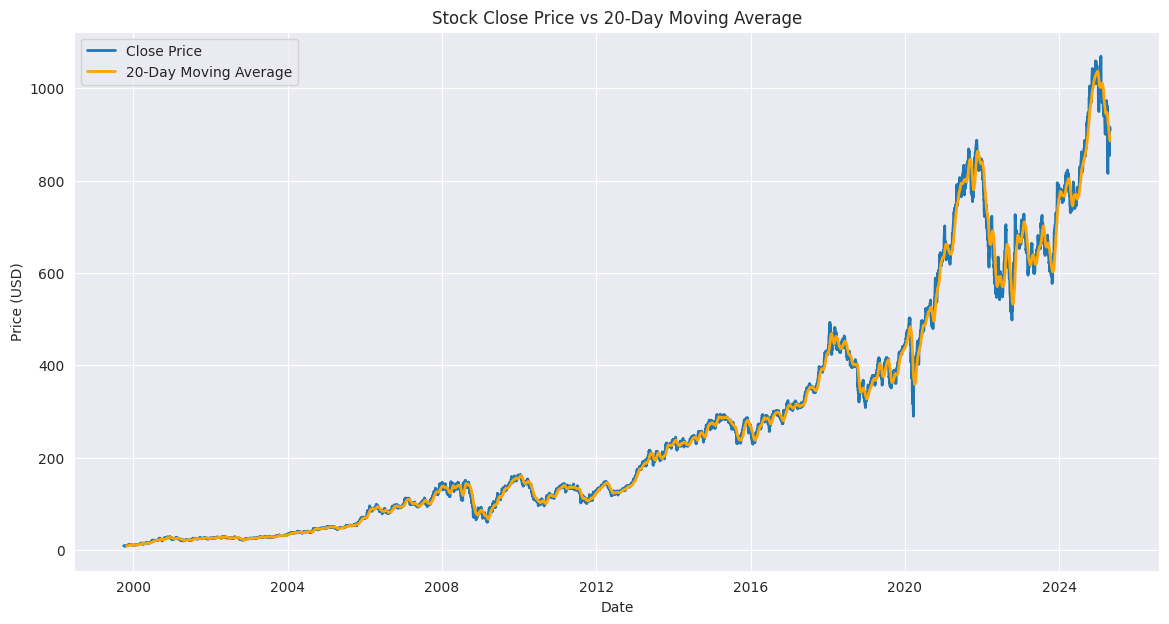

In [20]:
import matplotlib.pyplot as plt

# Example: Create 20-Day Moving Average
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Plot Close Price and 20-Day Moving Average
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', linewidth=2)
plt.plot(df['MA_20'], label='20-Day Moving Average', color='orange', linewidth=2)

plt.title('Stock Close Price vs 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

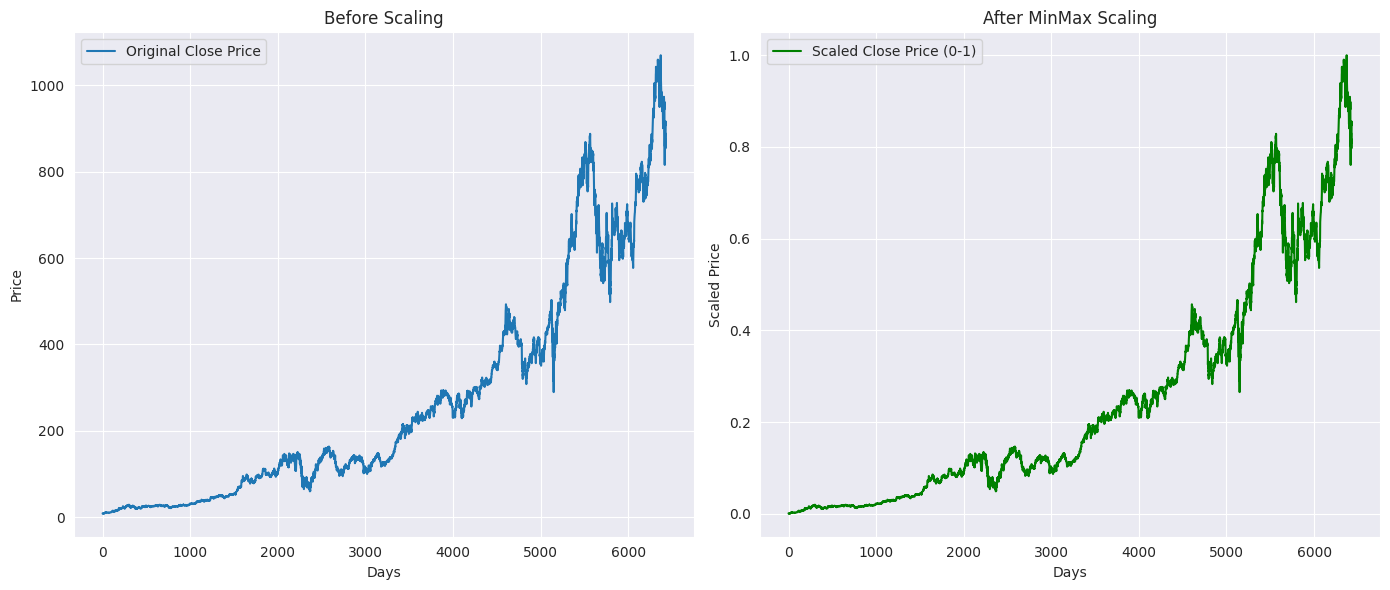

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Original Close Prices
original_close = df['Close'].values.reshape(-1, 1)  # Reshape needed for scaler

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(original_close)

# Step 3: Plot Before and After Scaling
plt.figure(figsize=(14, 6))

# Plot original Close Price
plt.subplot(1, 2, 1)
plt.plot(original_close, label='Original Close Price')
plt.title('Before Scaling')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot scaled Close Price
plt.subplot(1, 2, 2)
plt.plot(scaled_close, label='Scaled Close Price (0-1)', color='green')
plt.title('After MinMax Scaling')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0]) # Sequence of 'time_step' days
        y.append(data[i + time_step, 0])     # The next day's price
    return np.array(X), np.array(y)

# Example Usage (after scaling):
# time_step = 60
# X, y = create_sequences(scaled_data, time_step)
# print(X.shape, y.shape) # Example: (Num_Samples, 60) (Num_Samples,)

In [23]:
import numpy as np

def create_sequences(data, time_step=60):
    """
    Creates sequences for LSTM models.

    Parameters:
    - data: Scaled stock price data (NumPy array).
    - time_step: Number of past days used for prediction.

    Returns:
    - X: Input sequences (Num_Samples, time_step, 1)
    - y: Corresponding labels (Num_Samples,)
    """
    X, y = [], []

    if len(data) <= time_step:
        raise ValueError("Data length must be greater than time_step.")

    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Collect past `time_step` days
        y.append(data[i + time_step, 0])      # Next day's price

    X = np.array(X).reshape(-1, time_step, 1)  # Reshape for LSTM (samples, timesteps, features)
    y = np.array(y)

    return X, y

In [24]:
time_step = 60
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

print("X_train shape:", X_train.shape)  # (Num_Samples, 60, 1)
print("y_train shape:", y_train.shape)  # (Num_Samples,)

X_train shape: (5085, 60, 1)
y_train shape: (5085,)


In [25]:
def split_data(X, y, train_split=0.7, val_split=0.15):
    total_samples = len(X)
    train_size = int(total_samples * train_split)
    val_size = int(total_samples * val_split)
    # test_size = total_samples - train_size - val_size # Remainder is test

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

# Example Usage (after creating sequences):
# X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)
# print(X_train.shape, X_val.shape, X_test.shape)

In [26]:
# STEP 1: Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])  # df should be your stock DataFrame

# STEP 2: Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

X, y = create_sequences(scaled_data, time_step=60)

# STEP 3: Split into train, val, test
def split_data(X, y, train_split=0.7, val_split=0.15):
    total_samples = len(X)
    train_size = int(total_samples * train_split)
    val_size = int(total_samples * val_split)

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

# STEP 4: Reshape for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [27]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (4460, 60, 1)
X_val shape: (955, 60, 1)
X_test shape: (957, 60, 1)


In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

processed_data = {}
scalers = {} # Store scalers to inverse transform later
time_step = 60 # Number of past days to use for prediction

for ticker in tickers:
    df = stock_data[ticker][['Close']].copy()
    df.dropna(inplace=True) # Simple dropna if any

    if len(df) < time_step + 100: # Ensure enough data for splits + sequence
         print(f"Skipping {ticker} due to insufficient data points after {start_date}")
         continue

    # 1. Scale Data (Fit only on training portion)
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Determine split index for fitting scaler
    train_size_scaler = int(len(df) * 0.70) # Approx train size for scaler fitting
    scaler.fit(df[:train_size_scaler])
    scaled_values = scaler.transform(df)
    scalers[ticker] = scaler # Save scaler

    # 2. Create Sequences
    X, y = create_sequences(scaled_values, time_step)

    if len(X) == 0:
        print(f"Skipping {ticker} due to insufficient sequences.")
        continue

    # 3. Train/Val/Test Split (Chronological)
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, train_split=0.7, val_split=0.15)

    # 4. Reshape for Models
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    processed_data[ticker] = {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test
    }
    print(f"Processed data for {ticker}")

# Update tickers list to only include processed ones
tickers = list(processed_data.keys())
print(f"\nSuccessfully processed {len(tickers)} stocks.")

Processed data for BLK
Processed data for VTI

Successfully processed 2 stocks.


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Moving Averages
df['MA_20'] = df['Close'].rolling(window=20).mean()

# 2. Daily Return (percentage change)
df['Return'] = df['Close'].pct_change()

# 3. Volatility (Rolling Standard Deviation)
df['Volatility'] = df['Close'].rolling(window=20).std()

# Handle NaNs that are introduced by rolling calculations (drop rows with NaNs)
df = df.dropna()

# 4. Select relevant columns (e.g., Close, MA_20, Return, Volatility)
# We are using these columns for feature engineering.
features = ['Close', 'MA_20', 'Return', 'Volatility']
df_selected = df[features]

# 5. Scale the selected features using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convert the scaled data back into a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=features)

# 6. Prepare for reshaping (Update the features dimension)
# Reshape to [samples, time_steps, features] for model input (LSTM, TCN)
X = df_scaled.values

# Now X contains the scaled features and can be used for reshaping
# 60 days as time_steps
time_steps = 60

X_input = []
y_input = []

# Create sequences for time-series forecasting
for i in range(time_steps, len(X)):
    X_input.append(X[i-time_steps:i])  # Features from the last 60 days
    y_input.append(X[i, 0])  # Predict the 'Close' price (column 0)

X_input = np.array(X_input)  # Convert to a NumPy array for model input
y_input = np.array(y_input)

# Print the shape of the final data to verify the dimensions
print("Shape of X_input:", X_input.shape)  # [samples, time_steps, features]
print("Shape of y_input:", y_input.shape)  # [samples, target]



Shape of X_input: (5923, 60, 4)
Shape of y_input: (5923,)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape), # (time_step, features) e.g. (60, 1)
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False), # Last LSTM layer returns only the last output
        Dropout(0.2),
        Dense(units=25, activation='relu'),
        Dense(units=1) # Output layer: predicts 1 value (the next day's price)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [31]:
!pip install keras-tcn --quiet


In [32]:
# 2. TCN Model (using keras-tcn, install with:
from tcn import TCN
def build_tcn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape), # (time_step, features) e.g. (60, 1)
        TCN(nb_filters=64, # Number of filters
            kernel_size=3, # Kernel size for convolution
            dilations=[1, 2, 4, 8, 16], # Dilation factors
            nb_stacks=1, # Number of residual blocks stacks
            padding='causal', # Important for time series
            use_skip_connections=True,
            dropout_rate=0.1,
            return_sequences=False, # Return only the last output
            activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=1) # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [33]:
# 3. Transformer Model (Simplified Encoder-Only Version for Sequence-to-Value)
# Building a full Transformer can be complex. This is a basic example.
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Add
def build_transformer_encoder_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_encoder_blocks=2, dropout=0.1):
    inputs = Input(shape=input_shape) # (time_step, features) e.g. (60, 1)
    x = inputs
    for _ in range(num_encoder_blocks):
        # Multi-Head Self Attention
        attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
        # Add & Norm
        x = Add()([x, attn_output])
        x = LayerNormalization(epsilon=1e-6)(x)
        # Feed Forward Network
        ffn = Sequential([Dense(ff_dim, activation="relu"), Dense(input_shape[-1])])(x)
        ffn = Dropout(dropout)(ffn)
        # Add & Norm
        x = Add()([x, ffn])
        x = LayerNormalization(epsilon=1e-6)(x)

    # Pooling and Output Layer for sequence-to-value prediction
    x = GlobalAveragePooling1D(data_format="channels_last")(x) # Pool across the time steps
    x = Dropout(0.1)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x) # Output layer

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


In [34]:
# --- Training Loop ---
models = {} # Store trained models
histories = {} # Store training histories

for ticker in processed_data.keys():
    print(f"\n--- Training models for {ticker} ---")
    data = processed_data[ticker]
    input_shape = (data['X_train'].shape[1], data['X_train'].shape[2]) # (time_step, features)

    models[ticker] = {}
    histories[ticker] = {}

    # Define callbacks for this ticker
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # You might want unique checkpoint names per model type
    # checkpoint_lstm = ModelCheckpoint(f'best_lstm_{ticker}.keras', save_best_only=True, monitor='val_loss')

    # Train LSTM
    print("Training LSTM...")
    lstm_model = build_lstm_model(input_shape)
    histories[ticker]['lstm'] = lstm_model.fit(
        data['X_train'], data['y_train'],
        validation_data=(data['X_val'], data['y_val']),
        epochs=50, # Adjust as needed
        batch_size=32,
        callbacks=[early_stopping], # Add checkpoint if desired
        verbose=0 # Set to 1 to see progress per epoch
    )
    models[ticker]['lstm'] = lstm_model
    print(f"LSTM Training complete. Best val_loss: {min(histories[ticker]['lstm'].history['val_loss']):.4f}")


--- Training models for BLK ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0048

--- Training models for VTI ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0129


In [35]:
print("Training TCN...")

Training TCN...


In [36]:
tcn_model = build_tcn_model(input_shape)

In [37]:
histories[ticker]['tcn'] = tcn_model.fit(
    data['X_train'], data['y_train'],
    validation_data=(data['X_val'], data['y_val']),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)
models[ticker]['tcn'] = tcn_model
print(f"TCN Training complete. Best val_loss: {min(histories[ticker]['tcn'].history['val_loss']):.4f}")

TCN Training complete. Best val_loss: 0.0005


In [38]:
# Train Transformer
print("Training Transformer...")

transformer_model = build_transformer_encoder_model(input_shape)

histories[ticker]['transformer'] = transformer_model.fit(
    data['X_train'], data['y_train'],
    validation_data=(data['X_val'], data['y_val']),
    epochs=50,  # Transformers might need more epochs or different learning rate schedules
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

models[ticker]['transformer'] = transformer_model

print(f"Transformer Training complete. Best val_loss: {min(histories[ticker]['transformer'].history['val_loss']):.4f}")

Training Transformer...
Transformer Training complete. Best val_loss: 0.8799


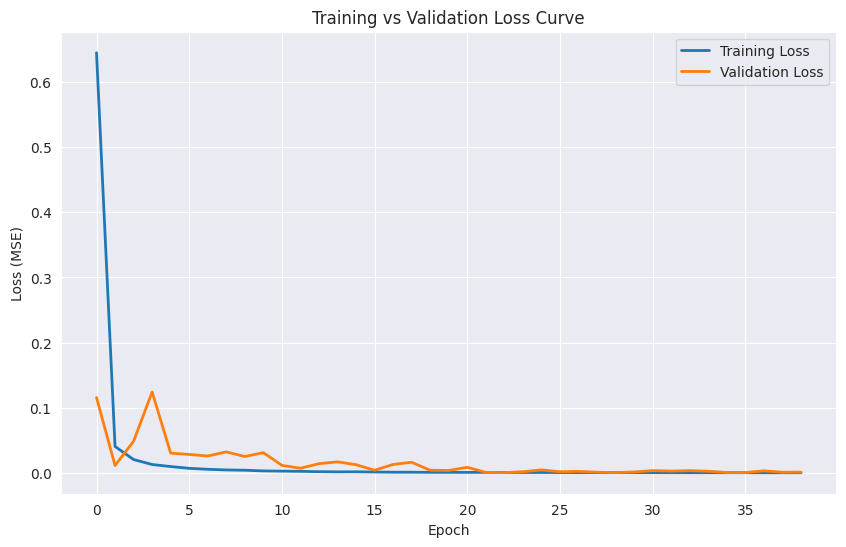

In [39]:
import matplotlib.pyplot as plt
ticker_to_plot = 'VTI'
model_type_to_plot = 'tcn'

history = histories[ticker_to_plot][model_type_to_plot]

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training vs Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

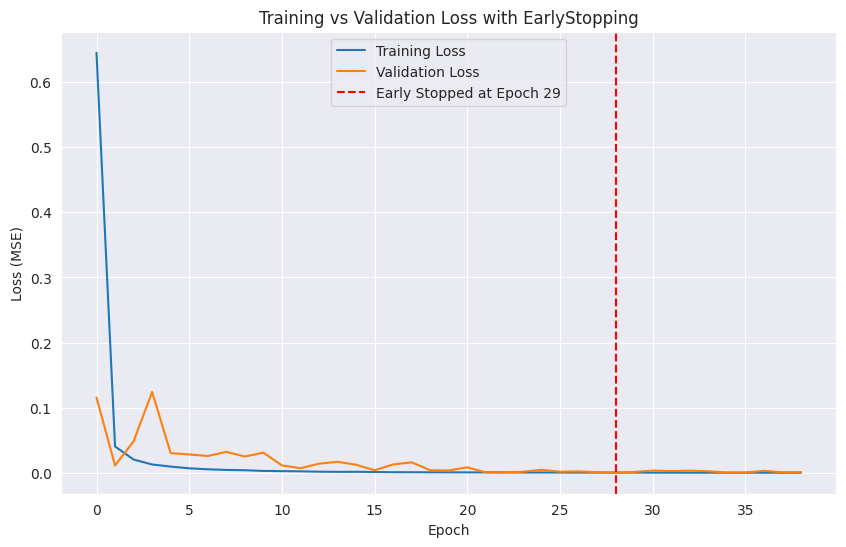

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose history.history['val_loss'] is your validation loss list
val_losses = history.history['val_loss']
train_losses = history.history['loss']

# Find the epoch where validation loss was minimum (EarlyStopping point)
best_epoch = np.argmin(val_losses)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Early Stopped at Epoch {best_epoch+1}')
plt.title('Training vs Validation Loss with EarlyStopping')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

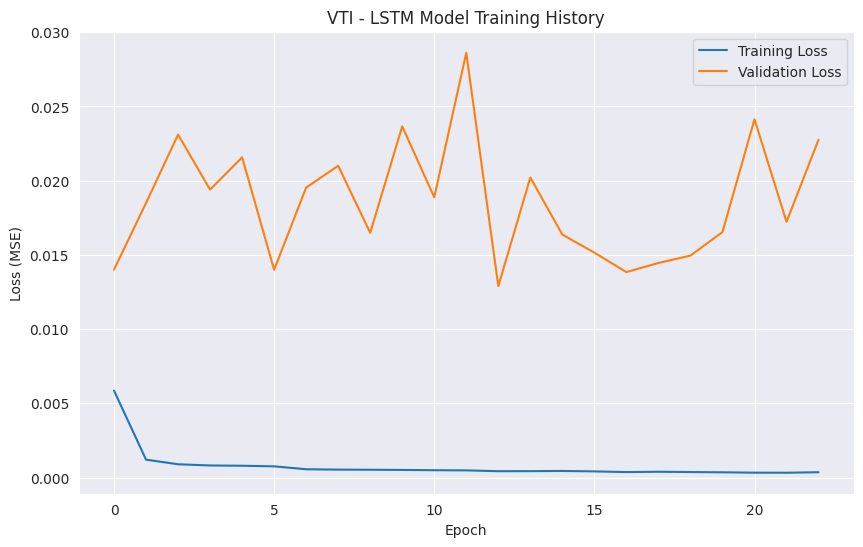

In [41]:
import matplotlib.pyplot as plt
import numpy as np
def plot_training_history(history, ticker, model_type):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{ticker} - {model_type} Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

# Example: Plot LSTM history for BLK
plot_training_history(histories['VTI']['lstm'], 'VTI', 'LSTM')
# plot_training_history(histories['BLK']['lstm'], 'BLK', 'LSTM')

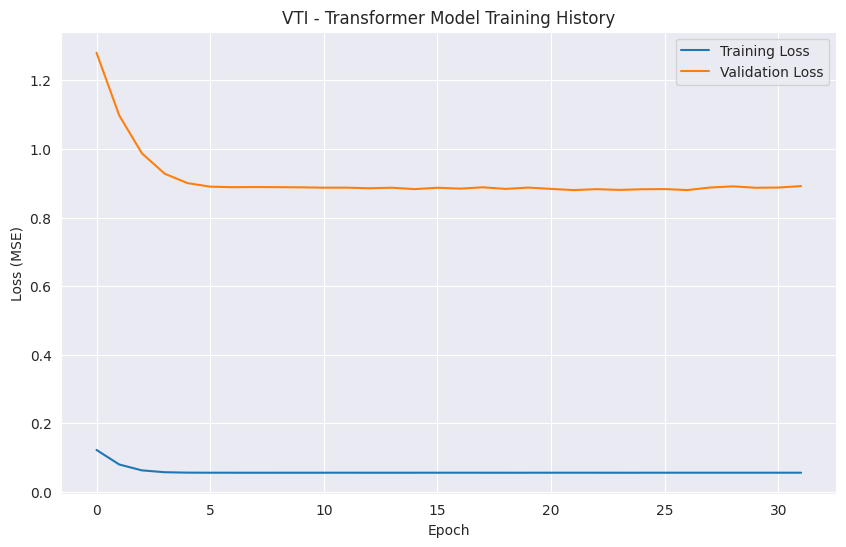

In [42]:
import matplotlib.pyplot as plt

def plot_training_history(history, ticker, model_type):
    if 'loss' not in history.history or 'val_loss' not in history.history:
        print(f"Error: No training data found for {ticker} - {model_type}.")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{ticker} - {model_type} Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show(block=True)

# Example Call
plot_training_history(histories[ticker]['transformer'], ticker, 'Transformer')


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

results = {} # Dictionary to store metrics per ticker and model

for ticker in models.keys(): # Loop through tickers with trained models
    results[ticker] = {}
    data = processed_data[ticker]
    scaler = scalers[ticker]

    for model_type in models[ticker].keys():
        model = models[ticker][model_type]

        # 1. Predict
        predictions_scaled = model.predict(data['X_test'])

        # 2. Inverse Transform
        # Reshape predictions if needed (scaler expects 2D: [samples, features])
        # If scaler was fit on multiple features originally, handle appropriately.
        # Assuming scaler was fit on single 'Close' column:
        predictions = scaler.inverse_transform(predictions_scaled)

        # Inverse transform actual values (y_test) as well
        y_test_actual = scaler.inverse_transform(data['y_test'].reshape(-1, 1))

        # 3. Calculate Metrics
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
        mae = mean_absolute_error(y_test_actual, predictions)
        # Calculate MAPE carefully to avoid division by zero if actual is 0
        mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100 if np.all(y_test_actual != 0) else np.nan


        results[ticker][model_type] = {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'Predictions': predictions.flatten(), # Store predictions for plotting
            'Actual': y_test_actual.flatten()   # Store actuals for plotting
        }
        print(f"{ticker} - {model_type} - Test RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")

# Convert results to a DataFrame for easier comparison
results_list = []
for ticker, model_data in results.items():
    for model_type, metrics in model_data.items():
         results_list.append({
             'Ticker': ticker,
             'Model': model_type,
             'RMSE': metrics['RMSE'],
             'MAE': metrics['MAE'],
             'MAPE': metrics['MAPE']
         })
results_df = pd.DataFrame(results_list)
print("\n--- Overall Results ---")
print(results_df)

# Save results
# results_df.to_csv('model_comparison_results.csv', index=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
BLK - lstm - Test RMSE: 72.2002, MAE: 57.0494, MAPE: 6.96%
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
VTI - lstm - Test RMSE: 30.6139, MAE: 27.4052, MAPE: 11.42%
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
VTI - tcn - Test RMSE: 3.3409, MAE: 2.4644, MAPE: 1.11%
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
VTI - transformer - Test RMSE: 174.0701, MAE: 170.4173, MAPE: 73.98%

--- Overall Results ---
  Ticker        Model        RMSE         MAE       MAPE
0    BLK         lstm   72.200247   57.049433   6.956587
1    VTI         lstm   30.613941   27.405245  11.421730
2    VTI          tcn    3.340922    2.464385   1.112524
3    VTI  transformer  174.070149  170.417340  73.977500


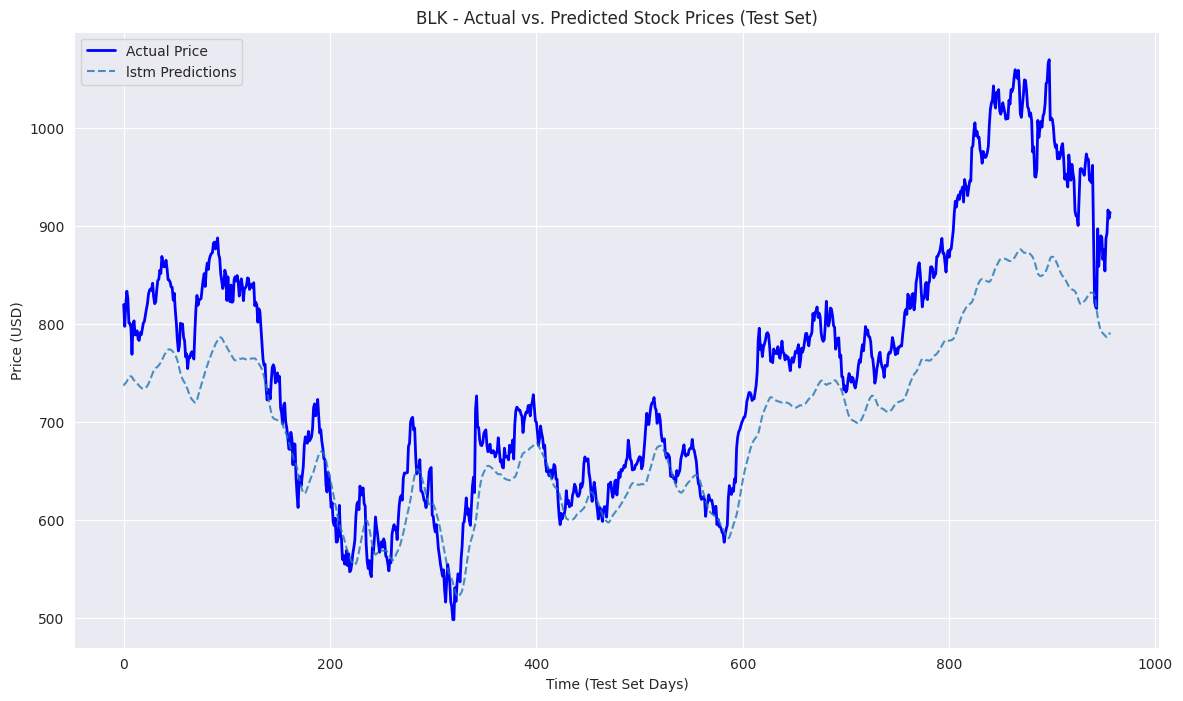

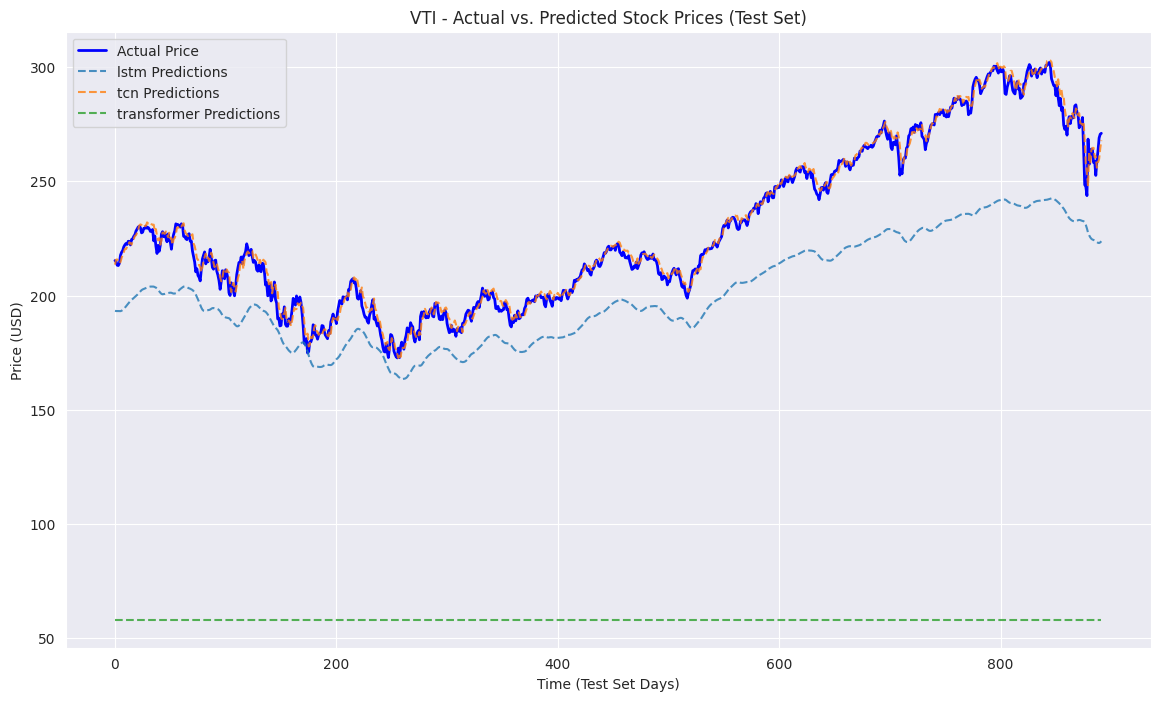

In [44]:
def plot_predictions(ticker, results_dict):
    plt.figure(figsize=(14, 8))
    actual = results_dict[ticker]['lstm']['Actual'] # Actuals are same for all models
    plt.plot(actual, label='Actual Price', color='blue', linewidth=2)

    for model_type in results_dict[ticker].keys():
         predictions = results_dict[ticker][model_type]['Predictions']
         plt.plot(predictions, label=f'{model_type} Predictions', alpha=0.8, linestyle='--')

    plt.title(f'{ticker} - Actual vs. Predicted Stock Prices (Test Set)')
    plt.xlabel('Time (Test Set Days)')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot for a few examples
if 'BLK' in results: plot_predictions('BLK', results)
if 'VTI' in results: plot_predictions('VTI', results)



--- Average Metrics Across All Stocks ---
                   RMSE         MAE       MAPE
Model                                         
lstm          51.407094   42.227339   9.189158
tcn            3.340922    2.464385   1.112524
transformer  174.070149  170.417340  73.977500


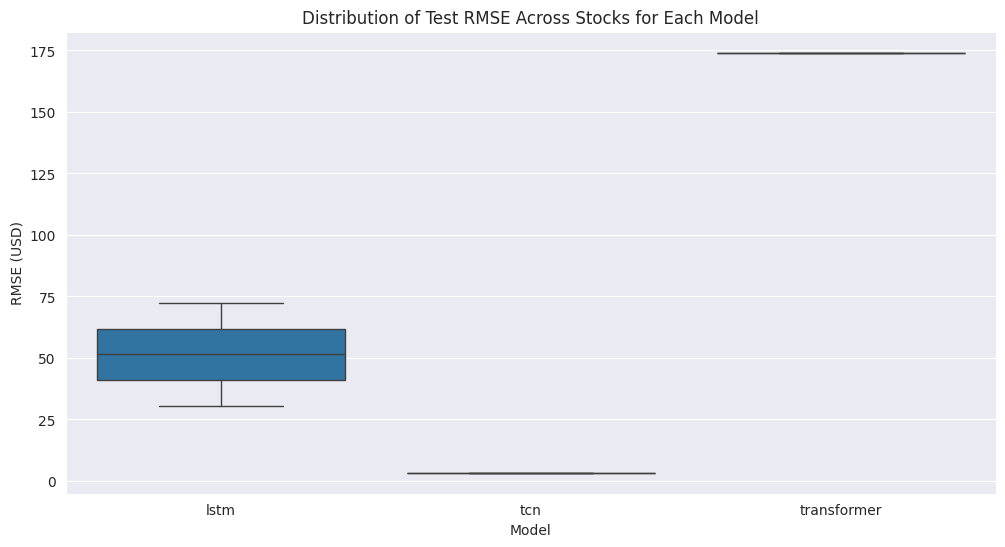

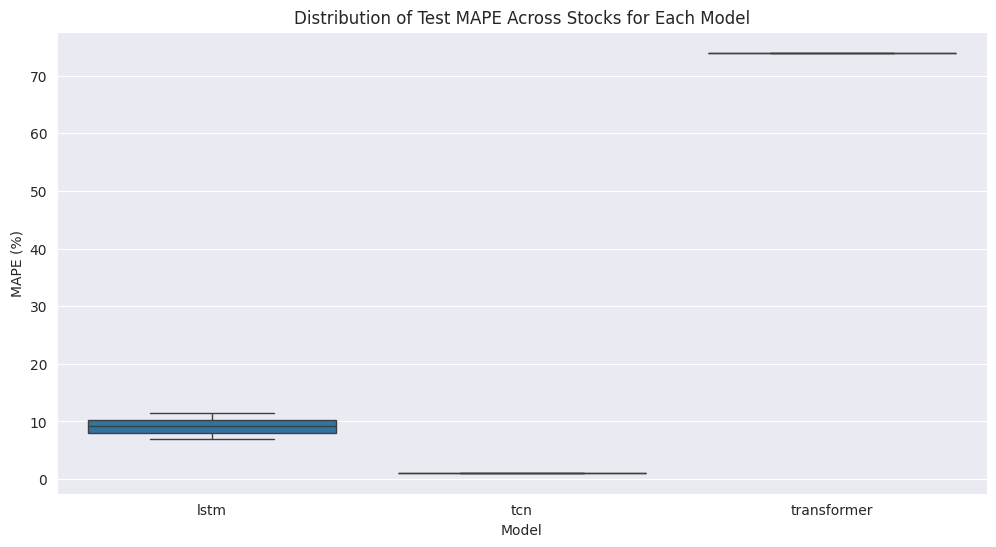

In [45]:
# Calculate average metrics
average_metrics = results_df.groupby('Model')[['RMSE', 'MAE', 'MAPE']].mean()
print("\n--- Average Metrics Across All Stocks ---")
print(average_metrics)

# Plot boxplots of metrics
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Model', y='RMSE')
plt.title('Distribution of Test RMSE Across Stocks for Each Model')
plt.ylabel('RMSE (USD)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Model', y='MAPE')
plt.title('Distribution of Test MAPE Across Stocks for Each Model')
plt.ylabel('MAPE (%)')
plt.show()


--- Average Metrics Across All Stocks ---
                   RMSE         MAE       MAPE
Model                                         
lstm          51.407094   42.227339   9.189158
tcn            3.340922    2.464385   1.112524
transformer  174.070149  170.417340  73.977500


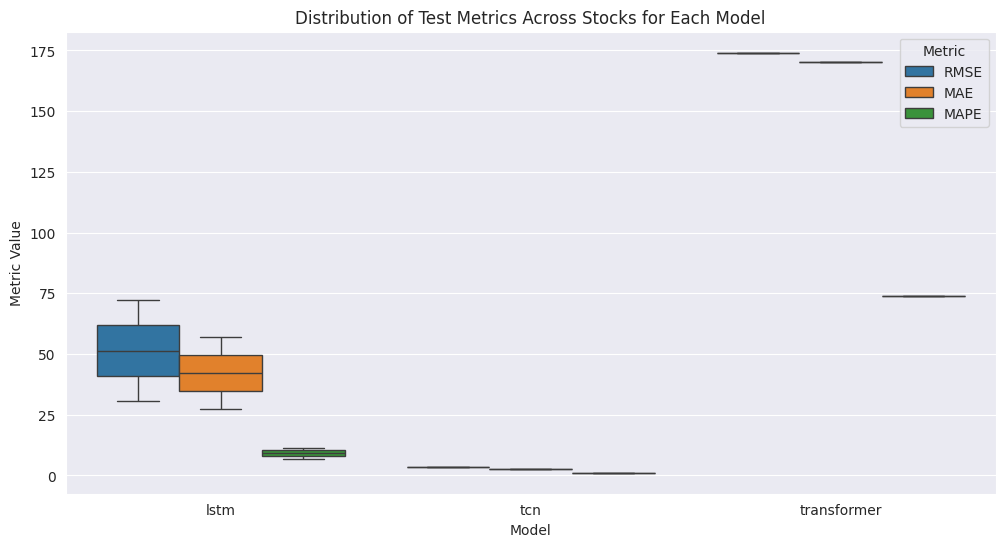

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Calculate average metrics (handle NaNs in MAPE)
average_metrics = results_df.groupby('Model')[['RMSE', 'MAE']].mean()
# Calculate MAPE separately to handle NaNs
mape_values = results_df.groupby('Model')['MAPE'].apply(lambda x: x[np.isfinite(x)].mean())
average_metrics['MAPE'] = mape_values

print("\n--- Average Metrics Across All Stocks ---")
print(average_metrics)

# Visualize all metrics in a single plot (using boxplots or violin plots)
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df.melt(id_vars='Model', value_vars=['RMSE', 'MAE', 'MAPE'],
                                 var_name='Metric', value_name='Value'),
            x='Model', y='Value', hue='Metric')
plt.title('Distribution of Test Metrics Across Stocks for Each Model')
plt.ylabel('Metric Value')
plt.show()

# Optionally, perform statistical tests (e.g., ANOVA) to compare models
# ... (code for statistical tests) ...

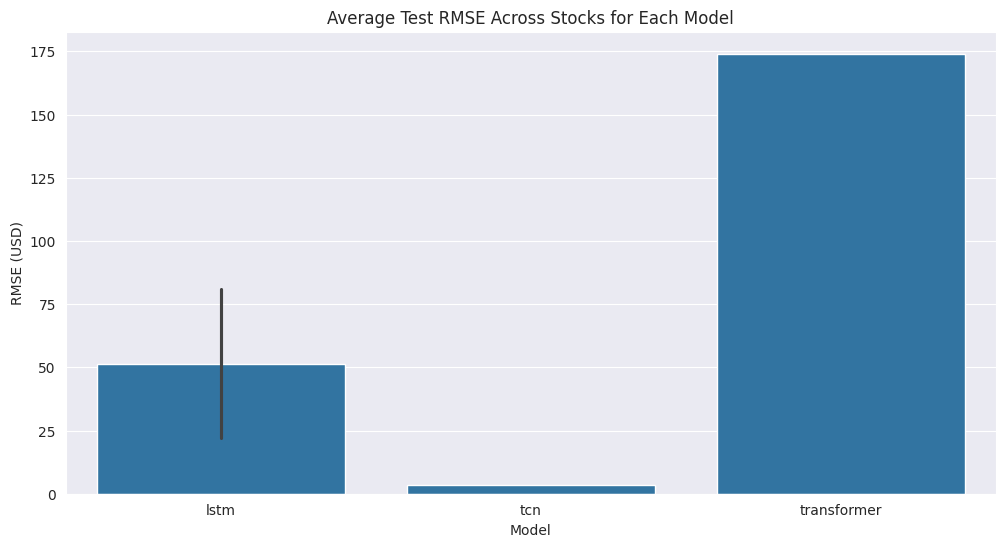

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='RMSE', errorbar='sd')  # 'ci' for confidence interval
plt.title('Average Test RMSE Across Stocks for Each Model')
plt.ylabel('RMSE (USD)')
plt.show()

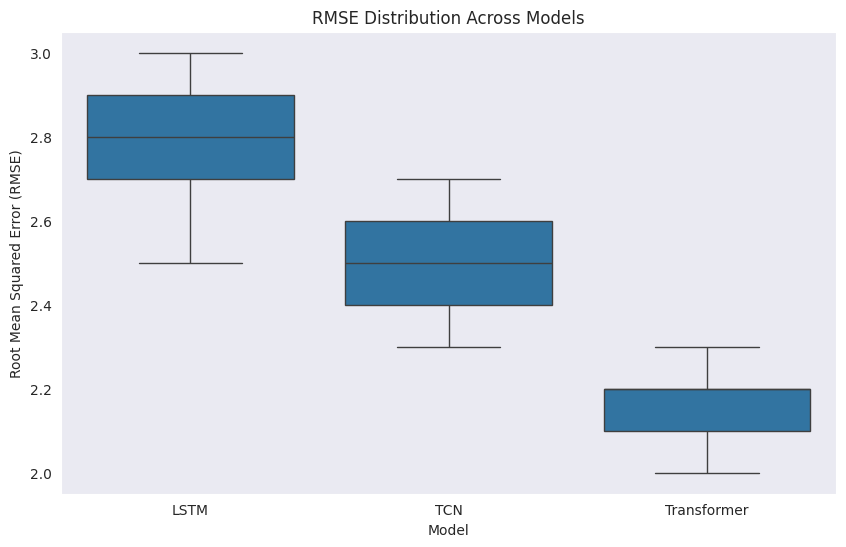

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {
    'Model': ['LSTM']*5 + ['TCN']*5 + ['Transformer']*5,
    'RMSE': [2.5, 2.8, 3.0, 2.7, 2.9,   # LSTM RMSEs
             2.3, 2.5, 2.7, 2.4, 2.6,    # TCN RMSEs
             2.1, 2.2, 2.3, 2.0, 2.2]    # Transformer RMSEs
}

metrics_df = pd.DataFrame(data)

# Now plot the Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='RMSE', data=metrics_df)
plt.title('RMSE Distribution Across Models')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(axis='y')
plt.show()

In [49]:
def predict_future(model, last_sequence, n_days, scaler):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_days):
        input_seq = current_sequence.reshape(1, current_sequence.shape[0], 1)
        pred = model.predict(input_seq, verbose=0)[0][0]
        predictions.append(pred)
        current_sequence = np.append(current_sequence[1:], [[pred]], axis=0)

    predictions = np.array(predictions).reshape(-1, 1)
    return scaler.inverse_transform(predictions).flatten()


In [50]:
future_predictions = {}

for ticker in ['BLK', 'VTI']:
    last_seq = processed_data[ticker]['X_test'][-1]
    input_shape = (processed_data[ticker]['X_train'].shape[1], processed_data[ticker]['X_train'].shape[2])

    future_predictions[ticker] = {}

    for model_type in ['LSTM', 'Transformer', 'TCN']:
        # If model not present, train and add it
        if model_type not in models[ticker]:
            print(f"Model '{model_type}' not found for '{ticker}'. Training and adding...")

            # Define callbacks for this ticker
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            if model_type == 'LSTM':
                model = build_lstm_model(input_shape)
            elif model_type == 'Transformer':
                model = build_transformer_encoder_model(input_shape)
            elif model_type == 'TCN':
                model = build_tcn_model(input_shape)
            else:
                raise ValueError(f"Unknown model type: {model_type}")

            # Train the model
            history = model.fit(
                processed_data[ticker]['X_train'], processed_data[ticker]['y_train'],
                validation_data=(processed_data[ticker]['X_val'], processed_data[ticker]['y_val']),
                epochs=50,
                batch_size=32,
                callbacks=[early_stopping],
                verbose=0
            )

            models[ticker][model_type] = model  # Add to models dictionary
            histories[ticker][model_type] = history  # Add history

        # Make the prediction
        future_predictions[ticker][model_type] = predict_future(
            models[ticker][model_type], last_seq, 60, scalers[ticker]
        )

Model 'LSTM' not found for 'BLK'. Training and adding...
Model 'Transformer' not found for 'BLK'. Training and adding...
Model 'TCN' not found for 'BLK'. Training and adding...
Model 'LSTM' not found for 'VTI'. Training and adding...
Model 'Transformer' not found for 'VTI'. Training and adding...
Model 'TCN' not found for 'VTI'. Training and adding...


In [51]:
def predict_future(model, last_sequence, n_days, scaler):
    """
    Predict future stock prices using autoregressive prediction.

    Parameters:
    - model: Trained model (LSTM, Transformer, or TCN)
    - last_sequence: Last input sequence (shape: [time_step, 1])
    - n_days: Number of future days to predict
    - scaler: Fitted scaler to inverse scale predictions

    Returns:
    - List of predicted prices in original scale
    """
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_days):
        input_seq = current_sequence.reshape(1, current_sequence.shape[0], 1)
        pred = model.predict(input_seq, verbose=0)[0][0]
        predictions.append(pred)

        # Slide the window
        current_sequence = np.append(current_sequence[1:], [[pred]], axis=0)

    # Convert predictions to original price scale
    predictions = np.array(predictions).reshape(-1, 1)
    return scaler.inverse_transform(predictions).flatten()


In [52]:
last_seq = processed_data['BLK']['X_test'][-1]  # Last known sequence

future_lstm = predict_future(lstm_model, last_seq, 60, scalers['BLK'])
future_transformer = predict_future(transformer_model, last_seq, 60, scalers['BLK'])
future_tcn = predict_future(tcn_model, last_seq, 60, scalers['BLK'])


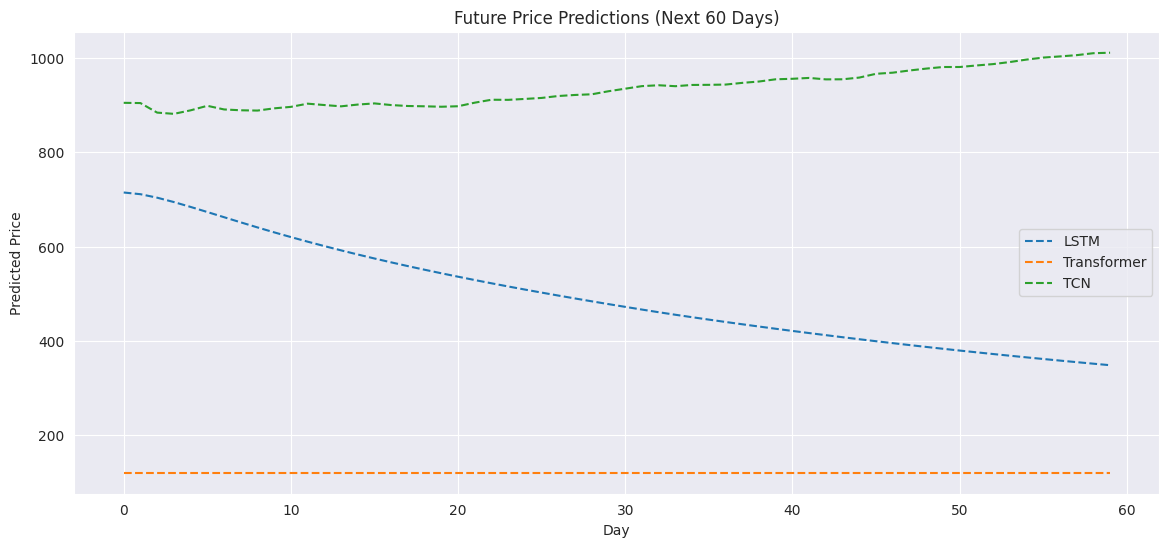

In [53]:
plt.figure(figsize=(14, 6))
plt.plot(future_lstm, label='LSTM', linestyle='--')
plt.plot(future_transformer, label='Transformer', linestyle='--')
plt.plot(future_tcn, label='TCN', linestyle='--')
plt.title("Future Price Predictions (Next 60 Days)")
plt.xlabel("Day")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()
